# Regressão de preços de residências usando redes neurais densas (DNNs)


## Importando as bibliotecas

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Baixando a base de dados

Neste exemplo, utilizaremos uma rede neural para aproximar o conjunto de dados do Boston Housing e predizer o custo médio de uma casa em uma área de Boston.

Esta base de dados contém informações do censo dos EUA relativos aos preços de residências em diferentes locais nos subúrbios de Boston **no final dos anos 1970**.

A base possui 506 exemplos e 13 atributos numéricos (atributos $x_i$ com $i$ variando de 1 a 13). O décimo quarto atributo (i.e., MEDV: Median value of owner-occupied homes in USD 1000's) é considerado como sendo o rótulo, ou seja, o valor que queremos predizer com o modelo.

A base de dados do Boston Housing é um das várias bases de dados disponibilizadas pela biblioteca TensorFlow.

Outras bases de dados estão disponíveis em [TF datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

A descrição das informações contidas no banco de dados segue abaixo.

| Attribute |                              Description                              |
|:---------:|:---------------------------------------------------------------------:|
|    CRIM   |                     per capita crime rate by town                     |
|     ZN    |    proportion of residential land zoned for lots over 25,000 sq.ft.   |
|   INDUS   |            proportion of non-retail business acres per town           |
|    CHAS   | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
|    NOX    |           nitric oxides concentration (parts per 10 million)          |
|     RM    |                  average number of rooms per dwelling                 |
|    AGE    |         proportion of owner-occupied units built prior to 1940        |
|    DIS    |          weighted distances to five Boston employment centres         |
|    RAD    |               index of accessibility to radial highways               |
|    TAX    |                full-value property-tax rate per USD 10.000               |
|  PTRATIO  |                      pupil-teacher ratio by town                      |
|     B     |  1000(Bk - 0.63)^2 where Bk is the proportion of black people by town |
|   LSTAT   |                     lower status of the population                    |
|    MEDV   |            Median value of owner-occupied homes in USD 1000's            |


**Objetivo**

O objetivo é treinar um modelo de regressão que prediga o valor médio das casas naquela área usando os 13 atributos fornecidos.

**Observação**

Observem que a função `load_data` divide o conjunto de dados em conjuntos de treinamento e teste. Por padrão, ela separa 80% do total para treinamento e 20% para testes.

Como o próprio nome já diz, o **conjunto de teste** é usado para treinar o modelo.

Já o **conjunto de teste** é usado para medir a **capacidade de generalização do modelo**, pois ele **não é usado durante o treinamento**.

In [119]:
data = tf.keras.datasets.boston_housing

(x_train, y_train), (x_test, y_test) = data.load_data()

### Dimensões dos conjuntos de treinamento e teste.

As arrays Numpy têm um atributo `shape`, o qual retorna uma *tupla* com as dimensões das arrays.

In [120]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [121]:
print(x_test.shape)
print(y_test.shape)

(102, 13)
(102,)


### Explorando os rótulos ($y$)

In [122]:
print('Preço mín. em 1K de USD: ',  y_train.min())
print('Preço médio em 1K de USD: ', round(y_train.mean(), 2))
print('Preço máx. em 1K de USD: ',  y_train.max())

Preço mín. em 1K de USD:  5.0
Preço médio em 1K de USD:  22.4
Preço máx. em 1K de USD:  50.0


#### Plotando o histograma

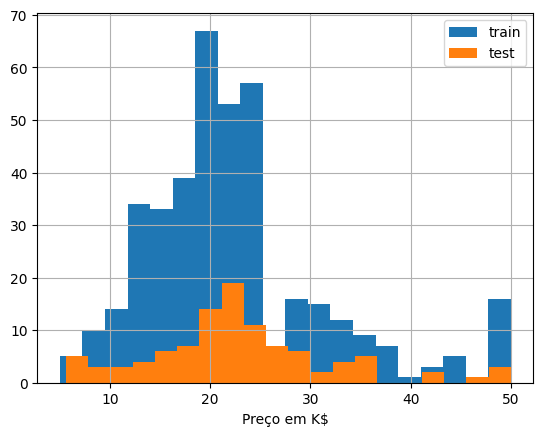

In [123]:
plt.hist(y_train, label='train', bins=20)
plt.hist(y_test, label = 'test', bins=20)
plt.xlabel('Preço em K$')
plt.grid()
plt.legend()
plt.show()

**Observação**

Vejam que os rótulos teste têm uma distribuição similar aos de treinamento, apenas uma quantidade menor.


### Explorando os atributos ($x_i, \forall i \in {1, ..., 13}$)

#### Verificando o intervalo de valores de cada atributo.

In [124]:
for i in range(len(x_train[0])):
  print("Atributo {} ==> varia de {} a {}".format(
      i+1, x_train[:,i].min(), x_train[:,i].max()
      )
  )

Atributo 1 ==> varia de 0.00632 a 88.9762
Atributo 2 ==> varia de 0.0 a 100.0
Atributo 3 ==> varia de 0.46 a 27.74
Atributo 4 ==> varia de 0.0 a 1.0
Atributo 5 ==> varia de 0.385 a 0.871
Atributo 6 ==> varia de 3.561 a 8.725
Atributo 7 ==> varia de 2.9 a 100.0
Atributo 8 ==> varia de 1.1296 a 10.7103
Atributo 9 ==> varia de 1.0 a 24.0
Atributo 10 ==> varia de 188.0 a 711.0
Atributo 11 ==> varia de 12.6 a 22.0
Atributo 12 ==> varia de 0.32 a 396.9
Atributo 13 ==> varia de 1.73 a 37.97


#### Plotando os histogramas dos atributos

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

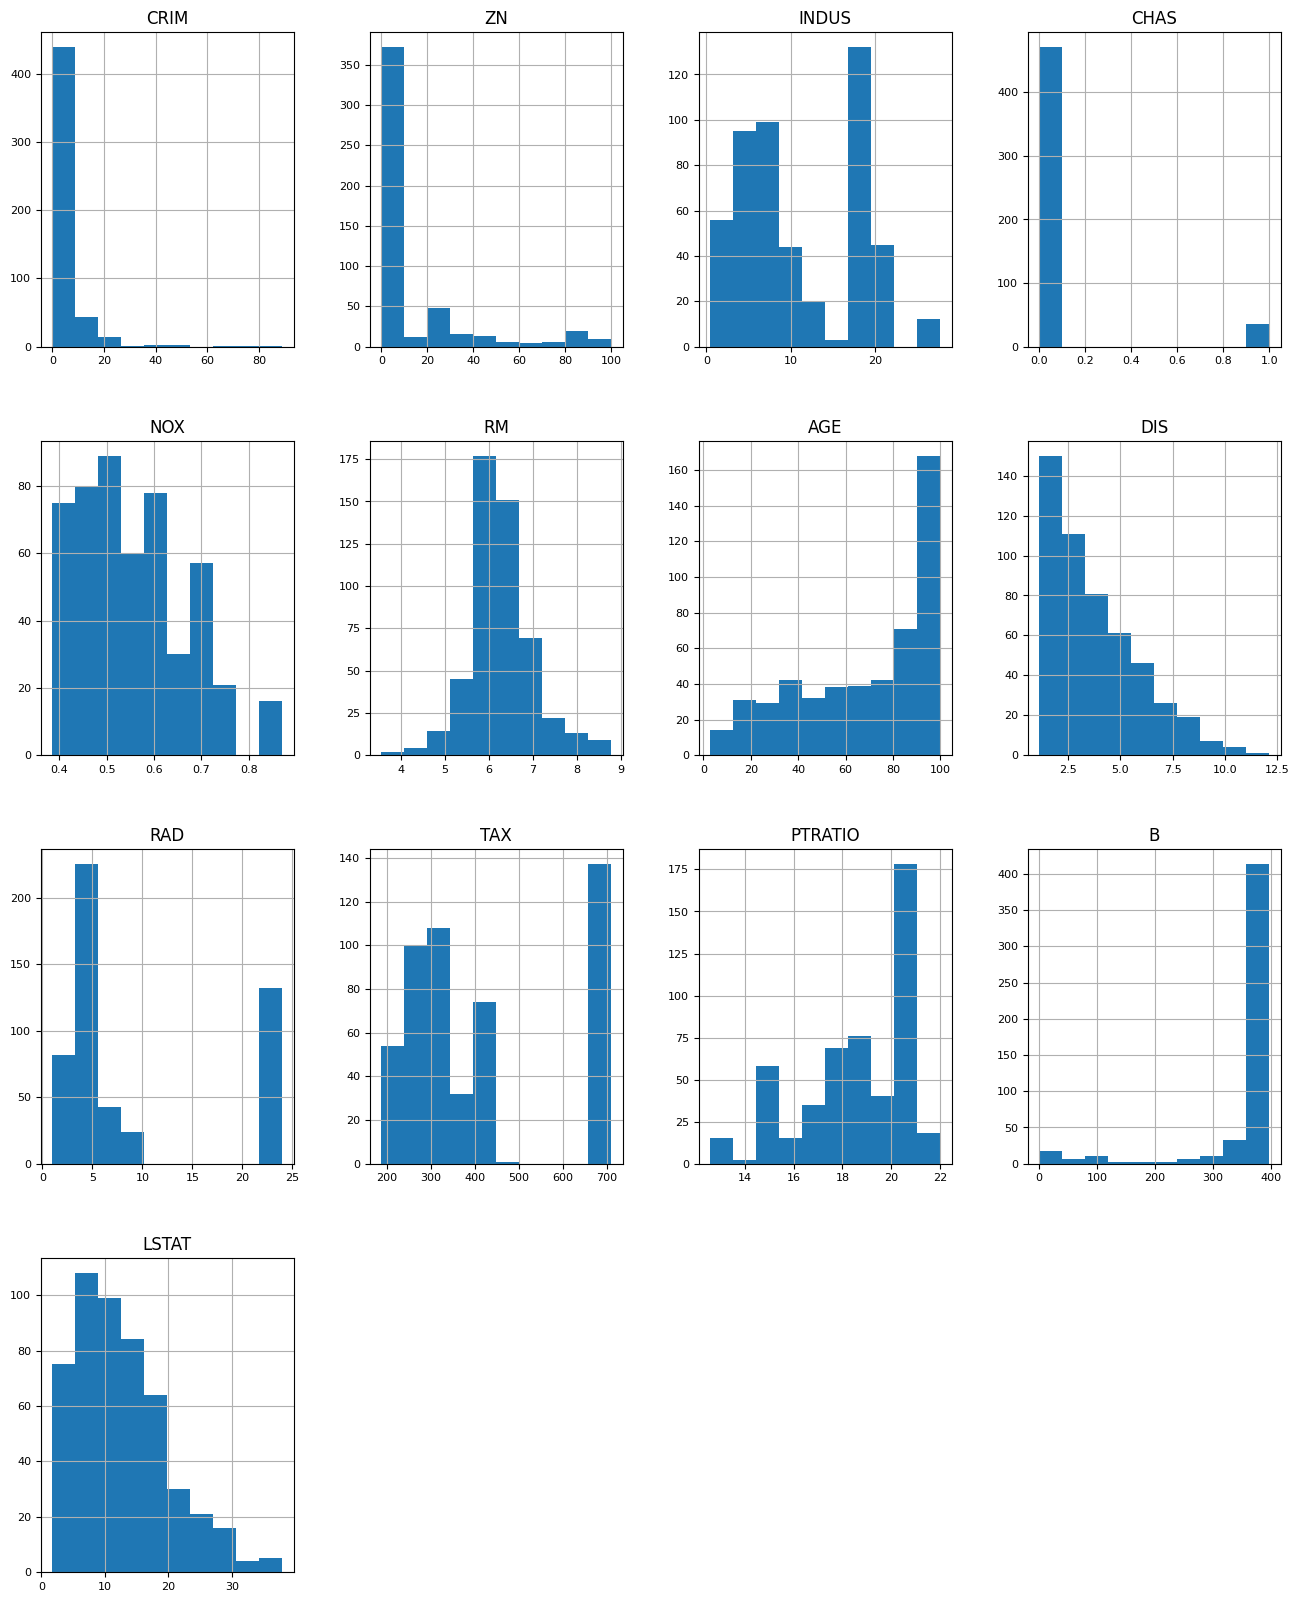

In [125]:
# Biblioteca para análise e manipulação de dados.
import pandas as pd

# Concatena os dois conjuntos em apenas um.
x = np.vstack([x_train, x_test])

# Cria um objeto do tipo DataFrame.
df = pd.DataFrame(x, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# Plota os histogramas de todos os atributos.
df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

### Preprocessamento dos dados

Como percebemos, os atributos têm diferentes intervalos de valores.

Quando os atributos têm intervalos de valores muito diferentes, os modelos de aprendizado de máquina, podem ser afetados com

  + **Influência Desproporcional**: Atributos com intervalos maiores podem ter uma influência desproporcional sobre o processo de aprendizado, levando o modelo a dar mais importância a esses atributos e menos importância aos atributos com intervalos menores.

  + **Dificuldade de Convergência**: Algoritmos de otimização, como o gradiente descendente, podem ter dificuldade em convergir rapidamente quando os atributos têm escalas muito diferentes. Isso pode resultar em um treinamento mais lento ou até mesmo na não convergência do modelo.

Uma forma de resolver ou mitigar estes problemas é através do **escalonamento dos atributos**.

O escalonamento de dados serve para garantir que os atributos estejam em uma escala compatível e comparável, melhorando assim o desempenho e a eficácia de muitos algoritmos de aprendizado.

Existem duas formas comuns de escalonamento que podem ser aplicadas aos atributos em um conjunto de dados:

+ **Normalização**: os valores dos atributos são transformados para um intervalo entre 0 e 1. A normalização de cada amostra, $x_i[n]$, do conjunto é feita da seguinte forma:
$$z_i[n] = \frac{x_i[n] - \min{x_i}}{\max{x_i}-\min{x_i}}, \forall i \in [1, ..., K]\;\;\ \text{e} \;\;\ n \in [0, ..., N-1],$$
onde $\min{x_i}$ e $\max{x_i}$ são os valores mínimo e máximo do $i$-ésimo atributo do conjunto de treinamento, respectivamente.

+ **Padronização**: os valores dos atributos são transformados para terem uma média igual a 0 e um desvio padrão igual a 1. A padronização de cada amostra, $x_i[n]$, do conjunto é feita da seguinte forma:
$$z_i[n] = \frac{x_i[n] - \mu_{x_i}}{\sigma_{x_i}}, \forall i \in [1, ..., K]\;\;\ \text{e} \;\;\ n \in [0, ..., N-1]$$
onde $\mu_{x_i}$ e $\sigma_{x_i}$ são a média e o desvio padrão das amostras do $i$-ésimo atributo do conjunto de treinamento, respectivamente.

**Observações**

+ Os parâmetros para escalonamento são calculados a partir do conjunto de treinamento e aplicados a todos os conjuntos.
  + Isso evita o vazamento de informações do futuro no treinamento (i.e., os dados inéditos do conjunto de testes) e garante consistência no pré-processamento, garantindo previsões coerentes em diferentes conjuntos de dados.
+ Em geral, não se aplica escalonamento aos rótulos.
+ Não existe uma regra direta para dizer quando normalizar ou
padronizar os atributos. Portanto, é comum treinar o modelo com os dados brutos, normalizados e padronizados e, em seguida, comparar o desempenho para cada um dos casos.

Usaremos a a classe `StandardScaler` da bilioteca `SciKit-learn` para padronizar os atributos.

In [126]:
# Importamos a classe StandardScaler.
from sklearn.preprocessing import StandardScaler

# Instanciamos um objeto da classe StandardScaler.
scaler = StandardScaler()

# Calcula-se os parâmetros de padronização usando o conjunto de treinamento.
scaler.fit(x_train)

# Usamos o método `transform` para padronizar os atributos de treinamento e teste.
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

Uma amostra padronizada

In [127]:
print(x_train_std[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


Comparando os valores máximos e mínimos antes e depois do escalonamento

In [128]:
print('Máx. antes do escalonamento:', x_train.max())
print('Mín. antes do escalonamento:', x_train.min())

print('\nMáx. depois do escalonamento:', x_train_std.max())
print('Mín. depois do escalonamento:', x_train_std.min())

Máx. antes do escalonamento: 711.0
Mín. antes do escalonamento: 0.0

Máx. depois do escalonamento: 9.234847178400438
Mín. depois do escalonamento: -3.8172503201932715


## Definindo o modelo

Sabemos que a base de dados possui 13 atributos. Portanto, a entrada da rede neural precisa ter uma dimensão igual a 13, ou seja, a rede deve ter 13 entradas.

O número de exemplos não é usado para especificar as dimensões de entrada da rede, pois ele pode ser alterado dependendo do tamanho do *mini-batch* usado.

In [129]:
x_train_std.shape

(404, 13)

In [130]:
x_train_std.shape[1]

13

<img src="https://raw.githubusercontent.com/zz4fap/tp557-iot-ml/main/figures/exercicio_regressao.png" width="400px">

Assim, definimos a variável `input_shape` usando apenas o número de colunas da matriz de entdada.

In [131]:
input_shape = x_train_std.shape[1]

print('Dimensão de entrada:', input_shape)

Dimensão de entrada: 13


Vamos inicialmente criar um modelo com uma única camada oculta com 20 neurônios, mas iremos validar outros valores mais tarde.

Desta forma, a rede que precisamos definir terá uma entrada com dimensão igual a 13, uma camada oculta com 20 neurônios e uma camada de saída com apenas um neurônio para corresponder à dimensão dos rótulos, $y$.

- [input] ==> [hidden] ==> [output]:
  - 13 ==> [20] ==>  1

**Observações**

+ Percebam que o número de entradas e saídas da rede neural é sempre definido pelo conjunto de dados que temos.
+ O que precisamos definir nós mesmos é o número de camadas e nós em cada uma dessas outras camadas.
   + O que precisamos ter como objetivo é encontrar o modelo mais simples e que ainda explique bem os dados, ou seja, generalize bem.
   + Modelos muito complexos (i.e., grandes) têm uma capacidade muito grande (i.e., memória) e podem acabar memorizando o conjunto de treinamento ao invés de encontrarem uma solução geral (i.e., sobreajuste).
+ Como encontramos os valores ideiais para estes **(hiper)parâmetros**?
   + Através de técnicas de otimização hiperparamétrica.
   + Veremos uma biblioteca que implementa algumas técnicas.

In [132]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(20, input_shape=[input_shape], activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


**Observação**

+ A camada de entrada possui 13 conexões, uma para cada atributo $x_i$.

+ Cada atributo se conecta a todos os neurônios da camada oculta, que tem 20 neurônios.

+ Assim, os parâmetros treináneis da camada oculta são $13 \times 20 + 20 = 280$, i.e., $13 \times 20$ pesos sinápticos mais $20$ pesos de bias por neurônio.

+ A camada de saída tem apenas um neurônio que está conectado às saídas de todos os neurônios da camada anterior. Assim, ela possui $20 + 1 = 21$ parâmetros treináneis, ou seja, $20$ pesos sinápticos e $1$ peso de bias.

+ Isso totaliza $280 + 21 = 301$ parâmetros treináveis (ou seja, 301 pesos).

## Compilando o modelo

Para compilar o modelo, precisamos definir uma função de erro a ser minimizada e o otimizador a ser usado para a minimização.

### Diferentes funções de erro.

Como vimos anteriormente, existem várias funções de erro que podemos utilizar para otimizar um modelo de aprendizado de máquina para problemas de regressão.

Além do MSE, temos

+ `Mean Absolute Error (MAE)` que é calculado como:
$$MAE=\frac{1}{n}\sum_{i=1}^{n}(\left|y_{i}-\hat{y}_{i}\right|)$$
  + Não amplifica erros maiores, o que pode torná-lo mais robusto a outliers.

+ `Root Mean Square Error (RMSE)`, que é a raiz quadrada do MSE e é calculado da seguinte forma:
$$RSME=\sqrt{\frac{1}{N}\sum_{i=1}^{N}{(y_{i}-\hat{y}_{i})}^2}$$
  + Toma-se a raíz quadrada do MSE para trazer a métrica de volta à mesma escala dos dados originais, tornando-a mais interpretável e comparável com os valores reais.
  + O MSE e o RMSE tendem a penalizar mais erros maiores, enquanto o MAE é mais tolerante a eles.

Podemos usar o MSE para calcular o erro (i.e., perda), mas também acompanhar o MAE ou RMSE. Isso é possível através do uso do parâmetro `metrics` do método `compile`, para o qual podemos passar uma **lista** com as métricas que queremos acompanhar.

### Otimizador

Em exemplos anteriores, usamos o Gradiente Descendente Estocástico (SGD) como otimizador. Neste exemplo, veremos um outro tipo de otimizador muito popular para o treinamento de redes neurais.

O otimizador que utilizaremos será o [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).

O Adam (Adaptive Moment Estimation) foi projetado para superar algumas limitações do SGD, como velocidade de convergência reduzida e passo de aprendizagem fixo.

Ele é uma variante (melhoria) do SGD que combina as técnicas do termo momentum e **passos** de aprendizagem adaptativos.

Usa estimativas dos momentos de primeira e segunda ordens (i.e., média e variância) para acelerar a convergência do algoritmo e evitar divergência e ajustar automaticamente os **passos** de aprendizagem de acordo com os gradientes em diferentes direções, respectivamente.

O valor do hiperparâmetro `learning_rate` é o padrão, i.e., $0.001$.

In [133]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'] # métrica usada para monitorar as etapas de treinamento e teste.
)

## Treinando o modelo

**Observações**

+ Se quisermos avaliar o desempenho do modelo no conjunto de teste durante o treinamento, podemos usar o parâmetro `validation_data` para passar o conjunto de testes para o método `fit`.

+ Atribuo o retorno do treinamento (i.e., dicionário com resultados) à variável `history` para que possamos plotar os resultados obtidos durante o treinamento.

In [134]:
history = model.fit(
    x_train_std,
    y_train,
    epochs=1000,
)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 619.6228 - mae: 23.1695
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 606.6358 - mae: 22.9243
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 594.0933 - mae: 22.6835
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 581.8619 - mae: 22.4432
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 569.9818 - mae: 22.2061
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 558.1627 - mae: 21.9643
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 545.9377 - mae: 21.7131
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 533.4933 - mae: 21.4542
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 520.9232 - mae: 21.1854
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 507.8526 - mae: 20.9062
Epoch 11/1000
13/13

### Avaliando o modelo treinado no conjunto de treinamento

O método `evaluate` retorna uma **lista** com valores da função de erro e das métricas defindas durante a compilação do modelo.

In [135]:
train_eval = model.evaluate(x_train_std, y_train)

print ("MSE no conjunto de treinamento: {:.5}".format(train_eval[0]))
print ("MAE no conjunto de treinamento: {:.5}".format(train_eval[1]))

13/13 [==============================] - 0s 2ms/step - loss: 6.4132 - mae: 1.8047
MSE no conjunto de treinamento: 6.4132
MAE no conjunto de treinamento: 1.8047


### Plotando os erros

In [136]:
# Verificando os resultados disponíveis no dicionário.
history.history.keys()

dict_keys(['loss', 'mae'])

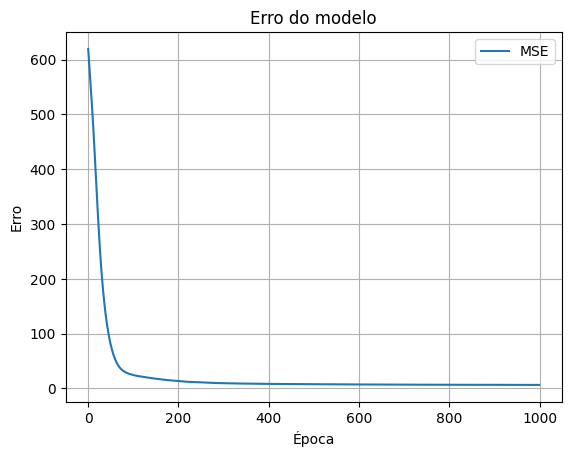

In [137]:
plt.plot(history.history['loss'], label='MSE')
plt.title('Erro do modelo')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(loc='upper right')
plt.grid()
plt.show()

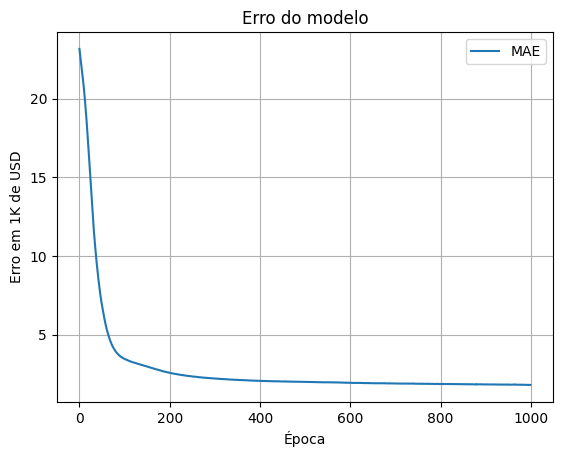

In [138]:
plt.plot(history.history['mae'], label='MAE')
plt.title('Erro do modelo')
plt.ylabel('Erro em 1K de USD')
plt.xlabel('Época')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## Testando o modelo treinado no conjunto de teste
### Medindo a capacidade de generalização



In [139]:
test_eval = model.evaluate(x_test_std, y_test)

print ("MSE no conjunto de teste: {:.5}".format(test_eval[0]))
print ("MAE no conjunto de teste: {:.5}".format(test_eval[1]))

4/4 [==============================] - 0s 4ms/step - loss: 15.4711 - mae: 2.7530
MSE no conjunto de teste: 15.471
MAE no conjunto de teste: 2.753


O modelo tem um MAE de cerca de 2760 dólares, o que parecer ser um **erro médio** razoável para **estimar** o preço de uma casa.

#### Comparando os 5 primeiros valores preditos com o esperados.

In [140]:
y_hat = model.predict(x_test_std)

print(y_hat[:5]) # obtém as predições para as 5 primeiras amostras do conjunto de teste

4/4 [==============================] - 0s 3ms/step
[[ 7.296834]
 [18.96468 ]
 [22.558468]
 [32.253067]
 [23.899185]]


In [141]:
print(y_test[:5]) # obtém os valores esperados para as 5 primeiras amostras

[ 7.2 18.8 19.  27.  22.2]


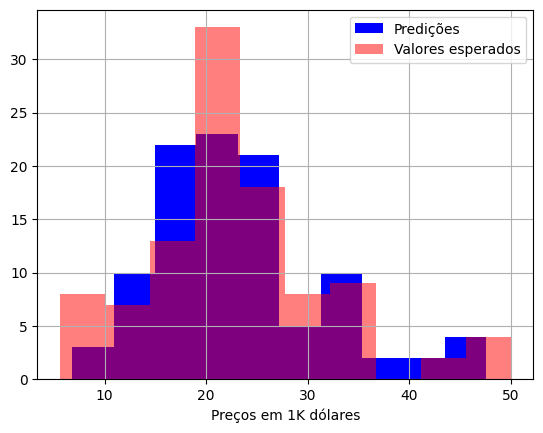

In [142]:
plt.hist(y_hat, label='Predições', color = 'b')
plt.hist(y_test, label = 'Valores esperados', color = 'r', alpha=0.5)
plt.xlabel('Preços em 1K dólares')
plt.legend()
plt.grid()
plt.show()

Observando o histograma acima, vemos que as predições estão de certa forma similares aos valores esperados em grande parte do intervalo, mas que existem alguns erros em determinados intervalos.

## Fazendo inferências

Vamos utilizar um valor totalmente inédito (valores chutados).

O objetivo final da criação de um modelo de regressão é fazer inferências, ou seja, utilizá-los com dados totalmente inéditos.

In [143]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 200, 19.5])
xt.shape

(13,)

Vejamos as dimensões do conjunto de treinamento (isso é válido para o te teste também).

Cada **linha** é um exemplo de entrada para o modelo. Portanto, o modelo espera vetores linha com 13 colunas como entrada.

In [144]:
x_train.shape

(404, 13)

Desta forma, precisamos fazer um **reshape** do novo vetor de atributos, pois o modelo espera vetores **linha**, ou seja, com dimensão $1 \times 13$.

In [145]:
xt = np.reshape(xt, (1, 13))
xt.shape

(1, 13)

Em seguida, padronizamos o novo dado.

**Observações**.:

+ Como treinamos o modelos com dados escalonados, o escalonamento (padronização, normalização, etc.) deve sempre aplicada a qualquer novo dado.
+ Percebam que usamos o mesmo objeto `scaler` usado para escalonar os dados de treinamento e teste.

In [146]:
xt_norm = scaler.transform(xt)

print(xt_norm)

[[-0.28659955 -0.48361547 -0.30934443 -0.25683275  0.36401915  1.03386853
   0.82381223  0.02945662 -0.62624905 -0.63729594  1.14850044 -1.64672402
   0.93287232]]


Ao final, relizamos a predição, ou seja, a estimativa do preço da casa.

In [147]:
yt = model.predict(xt_norm)

print(yt)
print(yt.shape)

1/1 [==============================] - 0s 36ms/step
[[16.005367]]
(1, 1)


In [148]:
print("O valor estimado para esta casa é de {:.2f} mil dólares".format(yt[0][0]))

O valor estimado para esta casa é de 16.01 mil dólares


## Encontrando os melhores hiperparâmetros

Para realizar a otimização hiperparamétrica, usaremos o KerasTuner.

O KerasTuner é um *framework* de otimização de hiperparâmetros escalável e fácil de usar que automatiza a busca pelos hiperparâmetros ótimos.

Ele implementa por padrão técnicas de otimização bayesiana, hiperband e busca aleatória. Outras técnicas podem ser criadas e usadas com ele.

Para mais informações, veja [KerasTuner](https://keras.io/keras_tuner/)


In [149]:
# Instalando o KerasTuner.
!pip install keras-tuner --upgrade

In [150]:
# Importanda a biblioteca KerasTuner.
import keras_tuner as kt

Para realizar a otimização hiperparamétrica com o KerasTuner, precisamos definir uma função que cria e retorna um modelo do TensorFlow.

A função precisa ter um argumento, por exemplo, chamado `hp`, que será usado para definir os hiperparâmetros durante a criação do modelo.

O argumento de entrada da função é um objeto da classe `HyperParameters`, o qual possui alguns métodos, entre eles o `Choice`, que escolhe um valor entre um conjunto predefinido de valores possíveis (por exemplo, de uma lista).

Para uma lista com todos os outros métodos da classe `HyperParameters`, veja [hyperparameters](https://keras.io/api/keras_tuner/hyperparameters/)

No código abaixo, testamos alguns valores para a quantidade de neurônios da camada oculta.

In [151]:
def build_model(hp):

  # Cria o modelo sequêncial.
  model = tf.keras.Sequential()

  # Adiciona a camada oculta.
  model.add(
      tf.keras.layers.Dense(
          hp.Choice('units', [10, 20, 30]),
          activation='relu')
  )

  # Adiciona a camada de saída.
  model.add(tf.keras.layers.Dense(1))

  # Compila o modelo.
  model.compile(optimizer='adam', loss='mse')

  # Retorna o modelo.
  return model

A biblioteca disponibiliza várias classes de otimizadores hiperparamétricos, mas neste exemplo, usaremos um dos mais simples, que é o `RandomSearch`, que como o próprio nome diz, faz uma busca aleatória pelos melhores valores.

Outros otimizadores podem ser encontrados em [Tuners](https://keras.io/api/keras_tuner/tuners/).

Durante a criação do objeto da classe `RandomSearch`, nós passamos a função que cria o modelo, definimos um `objective`, que neste caso é a minimização do erro de validação, `val_loss`, e, opcionalmente, pode-se definir o número máximo de tentativas, ou seja, de conjuntos de valores diferentes a serem testados, através do parâmetro `max_trials`.

In [152]:
# Instanciando um objeto da classe RandomSearch.
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss'
)

#### Fazendo a busca pelo melhor modelo.

O método `search` faz a busca pelo melhor conjunto de hiperparâmetros.

Passamos para ele os conjuntos de treinamento e validação e definimos o número de épocas em que cada modelo (conjunto de hiperparâmetros) será treinado

In [153]:
tuner.search(
    x_train_std, y_train,
    epochs=500,
    validation_data=(x_test_std, y_test)
)

Obtendo os melhores hiperparâmetros.

In [154]:
best_hps  = tuner.get_best_hyperparameters()[0]

print(f"""
A pesquisa de hiperparâmetros foi concluída. O número ideal de neurônios na camada oculta é {best_hps.get('units')}.
""")


A pesquisa de hiperparâmetros foi concluída. O número ideal de neurônios na camada oculta é 20.



Obtendo o melhor modelo.

In [155]:
best_model = tuner.get_best_models()[0]

Podemos imprimir um resumo do espaço de busca com o método `search_space_summary()`.

In [156]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Choice)
{'default': 10, 'conditions': [], 'values': [10, 20, 30], 'ordered': True}


Podemos também imprimir um resumo dos resultados da busca com o método `results_summary()`.

**Observação**

+ O `score` é baseado no `loss` configurado no método `compile` do modelo.
+ Assim, no caso abaixo, o `score` é o MSE e, portanto, quanto menor o `score`, melhor o modelo.

In [157]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0 summary
Hyperparameters:
units: 20
Score: 17.91876792907715

Trial 2 summary
Hyperparameters:
units: 30
Score: 18.493206024169922

Trial 1 summary
Hyperparameters:
units: 10
Score: 21.48969841003418
